# Task B: Data Preprocessing

## 1. Preprocess the label file of MRI dataset

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd

import pickle

with open('DataAfterProcess/label_AfterProcess.pickle', 'rb') as handle:
    y = pickle.load(handle)

## 2. Preprocess MRI images

In [21]:
# Import necessary libraries
import cv2
from glob import glob

In [22]:
# Read 3000 512x512 pixel gray-scale MRI images
images = [cv2.imread(image, cv2.IMREAD_GRAYSCALE) 
          for image in glob('dataset/image/*.jpg')]

images_blur = [cv2.medianBlur(images[i], 5)
               for i in range(0, len(images))]

resize = 128
images_resized = [cv2.resize(images_blur[i], (resize,resize))
                  for i in range(0, len(images))]

In [23]:
hog = cv2.HOGDescriptor()   

images_hog = [hog.compute(images_resized[i])
              for i in range(0, len(images))]


# images_hog = hog.compute(images_resized[0])
# images_hog.shape

In [24]:
# Transfer images into array dataformat.
images_TaskB = np.array(images_hog)

images_TaskB = images_TaskB.reshape(3000, images_TaskB.shape[1])
images_TaskB.shape

(3000, 34020)

In [25]:
# Save variance_ratio data generated by PCA process of images with help of pickle.
with open('DataBackUp/images_hog_128.pickle', 'wb') as handle:
    pickle.dump(images_TaskB, handle)

In [32]:
from sklearn.decomposition import PCA
n_components_test = 300

pca_test = PCA(n_components=n_components_test)
pca_test.fit(images_TaskB)

PCA(n_components=300)

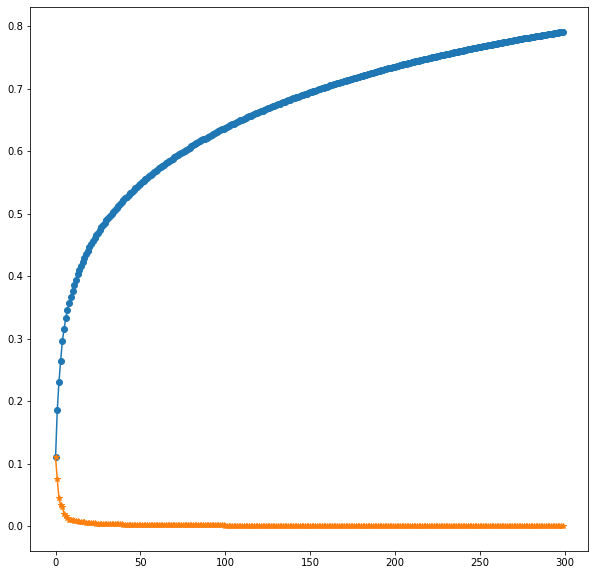

In [33]:
import matplotlib.pyplot as plt

variance_ratio = pca_test.explained_variance_ratio_
variance_ratio_cum = variance_ratio.cumsum()

plt.figure(figsize=(10,10))
plt.plot(variance_ratio_cum[:n_components_test], 'o-')
plt.plot(variance_ratio[:n_components_test], '*-')

In [47]:
pca_TaskB = PCA(n_components=300)
images_PCA_TaskB = pca_TaskB.fit_transform(images_TaskB)

In [48]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into a training set and a test set (90% training and 10% testing data).
# Notice that all random state is chosen as 0 in this assignment to ensure reproducibility.
X_train, X_test, y_train, y_test = train_test_split(images_PCA_TaskB,y, 
                                                    test_size=0.1, random_state=0)

# Check result.
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((2700, 300), (2700,), (300, 300), (300,))

In [56]:
# Call the SVC() model from sklearn and fit the model to the training data.
svm_PCA = SVC(C=12)
svm_PCA.fit(X_train, y_train)

SVC(C=12)

In [57]:
# Get predictions from the model.
pred = svm_PCA.predict(X_test)

# Check the accuracy score.
print('Accuracy score:', accuracy_score(y_test,pred))

Accuracy score: 0.9466666666666667


In [125]:
# Call the SVC() model from sklearn and fit the model to the training data.
svm_PCA = SVC(C=10)
svm_PCA.fit(X_train_PCA, y_train_PCA)

# Get predictions from the model.
pred_PCA = svm_PCA.predict(X_test_PCA)

# Check the accuracy score.
print('Accuracy score:', accuracy_score(y_test_PCA,pred_PCA))

Accuracy score: 0.96


## 4. Save preprocessed data

In [22]:
# Import necessary libraries
import pickle

In [44]:
# Generate new data array of preprocessed data.
# images_AfterProcess = images_PCA.copy()
images_AfterProcess = images_TaskB.copy()
label_AfterProcess = label_TaskB.copy()

# Check preprocessed data.
images_AfterProcess.shape, label_AfterProcess.shape

((3000, 4096), (3000,))

In [61]:
# Save preprocessed data with help of pickle.
with open('DataAfterProcess/images_AfterProcess.pickle', 'wb') as handle:
    pickle.dump(images_PCA_TaskB, handle)

In [46]:
# Save variance_ratio data generated by PCA process of images with help of pickle.
with open('DataBackUp/variance_ratio.pickle', 'wb') as handle:
    pickle.dump(variance_ratio, handle)

In [26]:
with open('DataAfterProcess/label_AfterProcess.pickle', 'wb') as handle:
    pickle.dump(label_TaskA, handle)

NameError: name 'label_TaskA' is not defined